In [1]:
# Import all Libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go
from plotly.offline import init_notebook_mode, iplot

init_notebook_mode(connected=True)  


data = pd.read_csv("dailyActivity_merged.csv")
print(data.head())

           Id ActivityDate  TotalSteps  TotalDistance  TrackerDistance  \
0  1503960366    4/12/2016       13162           8.50             8.50   
1  1503960366    4/13/2016       10735           6.97             6.97   
2  1503960366    4/14/2016       10460           6.74             6.74   
3  1503960366    4/15/2016        9762           6.28             6.28   
4  1503960366    4/16/2016       12669           8.16             8.16   

   LoggedActivitiesDistance  VeryActiveDistance  ModeratelyActiveDistance  \
0                       0.0                1.88                      0.55   
1                       0.0                1.57                      0.69   
2                       0.0                2.44                      0.40   
3                       0.0                2.14                      1.26   
4                       0.0                2.71                      0.41   

   LightActiveDistance  SedentaryActiveDistance  VeryActiveMinutes  \
0                 6.06

In [2]:
# Sum all Null Values
data.isnull().sum()

Id                          0
ActivityDate                0
TotalSteps                  0
TotalDistance               0
TrackerDistance             0
LoggedActivitiesDistance    0
VeryActiveDistance          0
ModeratelyActiveDistance    0
LightActiveDistance         0
SedentaryActiveDistance     0
VeryActiveMinutes           0
FairlyActiveMinutes         0
LightlyActiveMinutes        0
SedentaryMinutes            0
Calories                    0
dtype: int64

In [3]:
# Find info about the columns in dataste
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 940 entries, 0 to 939
Data columns (total 15 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Id                        940 non-null    int64  
 1   ActivityDate              940 non-null    object 
 2   TotalSteps                940 non-null    int64  
 3   TotalDistance             940 non-null    float64
 4   TrackerDistance           940 non-null    float64
 5   LoggedActivitiesDistance  940 non-null    float64
 6   VeryActiveDistance        940 non-null    float64
 7   ModeratelyActiveDistance  940 non-null    float64
 8   LightActiveDistance       940 non-null    float64
 9   SedentaryActiveDistance   940 non-null    float64
 10  VeryActiveMinutes         940 non-null    int64  
 11  FairlyActiveMinutes       940 non-null    int64  
 12  LightlyActiveMinutes      940 non-null    int64  
 13  SedentaryMinutes          940 non-null    int64  
 14  Calories  

In [4]:
# Change ActivityDate datatype
data['ActivityDate'] = pd.to_datetime(data["ActivityDate"])

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 940 entries, 0 to 939
Data columns (total 15 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   Id                        940 non-null    int64         
 1   ActivityDate              940 non-null    datetime64[ns]
 2   TotalSteps                940 non-null    int64         
 3   TotalDistance             940 non-null    float64       
 4   TrackerDistance           940 non-null    float64       
 5   LoggedActivitiesDistance  940 non-null    float64       
 6   VeryActiveDistance        940 non-null    float64       
 7   ModeratelyActiveDistance  940 non-null    float64       
 8   LightActiveDistance       940 non-null    float64       
 9   SedentaryActiveDistance   940 non-null    float64       
 10  VeryActiveMinutes         940 non-null    int64         
 11  FairlyActiveMinutes       940 non-null    int64         
 12  LightlyActiveMinutes  

In [5]:
# Make a Total Minutes Column
data['TotalMinutes']= data['VeryActiveMinutes'] + data['FairlyActiveMinutes'] + data['LightlyActiveMinutes'] + data["SedentaryMinutes"]

data['TotalMinutes'].sample(5)

678    1440
146    1440
372    1038
917    1440
834     871
Name: TotalMinutes, dtype: int64

In [6]:
# Display DataFrame
data.head()

,Id,ActivityDate,TotalSteps,TotalDistance,TrackerDistance,LoggedActivitiesDistance,VeryActiveDistance,ModeratelyActiveDistance,LightActiveDistance,SedentaryActiveDistance,VeryActiveMinutes,FairlyActiveMinutes,LightlyActiveMinutes,SedentaryMinutes,Calories,TotalMinutes
0,1503960366,2016-04-12,13162,8.50,8.50,0.0,1.88,0.55,6.06,0.0,25,13,328,728,1985,1094
1,1503960366,2016-04-13,10735,6.97,6.97,0.0,1.57,0.69,4.71,0.0,21,19,217,776,1797,1033
2,1503960366,2016-04-14,10460,6.74,6.74,0.0,2.44,0.40,3.91,0.0,30,11,181,1218,1776,1440
3,1503960366,2016-04-15,9762,6.28,6.28,0.0,2.14,1.26,2.83,0.0,29,34,209,726,1745,998
4,1503960366,2016-04-16,12669,8.16,8.16,0.0,2.71,0.41,5.04,0.0,36,10,221,773,1863,1040


In [7]:
# Deescribe the dataframe
data.describe()

,Id,TotalSteps,TotalDistance,TrackerDistance,LoggedActivitiesDistance,VeryActiveDistance,ModeratelyActiveDistance,LightActiveDistance,SedentaryActiveDistance,VeryActiveMinutes,FairlyActiveMinutes,LightlyActiveMinutes,SedentaryMinutes,Calories,TotalMinutes
count,9.400000e+02,940.000000,940.000000,940.000000,940.000000,940.000000,940.000000,940.000000,940.000000,940.000000,940.000000,940.000000,940.000000,940.000000,940.000000
mean,4.855407e+09,7637.910638,5.489702,5.475351,0.108171,1.502681,0.567543,3.340819,0.001606,21.164894,13.564894,192.812766,991.210638,2303.609574,1218.753191
std,2.424805e+09,5087.150742,3.924606,3.907276,0.619897,2.658941,0.883580,2.040655,0.007346,32.844803,19.987404,109.174700,301.267437,718.166862,265.931767
min,1.503960e+09,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000
25%,2.320127e+09,3789.750000,2.620000,2.620000,0.000000,0.000000,0.000000,1.945000,0.000000,0.000000,0.000000,127.000000,729.750000,1828.500000,989.750000
50%,4.445115e+09,7405.500000,5.245000,5.245000,0.000000,0.210000,0.240000,3.365000,0.000000,4.000000,6.000000,199.000000,1057.500000,2134.000000,1440.000000
75%,6.962181e+09,10727.000000,7.712500,7.710000,0.000000,2.052500,0.800000,4.782500,0.000000,32.000000,19.000000,264.000000,1229.500000,2793.250000,1440.000000
max,8.877689e+09,36019.000000,28.030001,28.030001,4.942142,21.920000,6.480000,10.710000,0.110000,210.000000,143.000000,518.000000,1440.000000,4900.000000,1440.000000


## Analyze SmartchWatch Data
The dataset includes a column named "Calories" which contains information about the daily calorie expenditure. We will now examine the correlation between the number of calories burned and the total number of steps taken in a day.

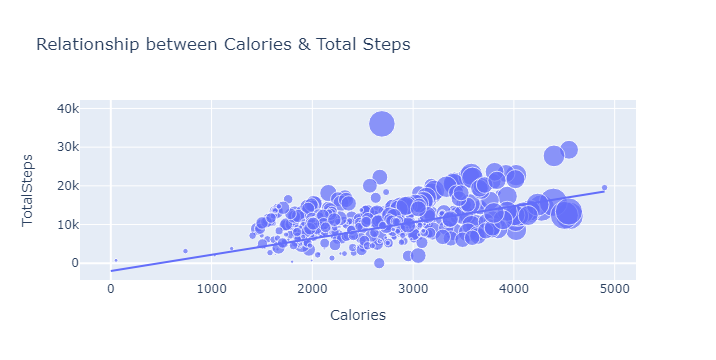

In [8]:
# Linear Regression line to find correlation between Claories and Steps
figure = px.scatter(data_frame = data, x="Calories",
                    y="TotalSteps", size="VeryActiveMinutes", 
                    trendline="ols", 
                    title="Relationship between Calories & Total Steps")
figure.show()

We can observe a linear correlation between the total calories burned and the total steps taken in a day. Next, let's explore the average total active minutes per day.

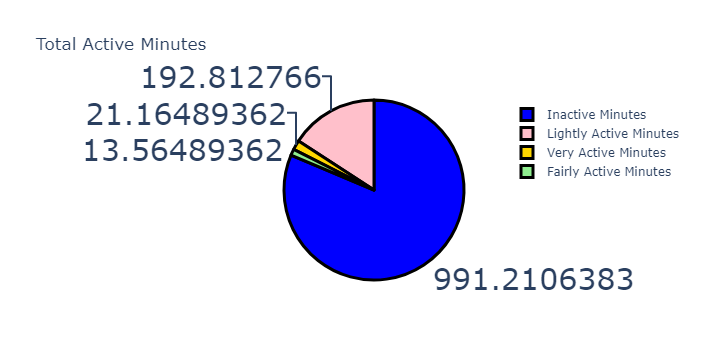

In [9]:
label = ["Very Active Minutes", "Fairly Active Minutes", 
         "Lightly Active Minutes", "Inactive Minutes"]
counts = data[["VeryActiveMinutes", "FairlyActiveMinutes", 
               "LightlyActiveMinutes", "SedentaryMinutes"]].mean()
colors = ['gold','lightgreen', "pink", "blue"]

fig = go.Figure(data=[go.Pie(labels=label, values=counts)])
fig.update_layout(title_text='Total Active Minutes')
fig.update_traces(hoverinfo='label+percent', textinfo='value', textfont_size=30,
                  marker=dict(colors=colors, line=dict(color='black', width=3)))
fig.show()

Findings:
- The majority of the day is spent inactive, accounting for 81.3% of the total day.
- Light activity represents 15.8% of the day.
- Very active minutes make up only 1.74% of the day on average, with an average of 21 minutes.
- Fairly active minutes account for 1.11% of the day, averaging at 13 minutes.

Above, we converted the data type of the "ActivityDate" column to a datetime format. Using this column, we can extract the weekday for each record and add a new column to the dataset called "Day".

In [10]:
# Add Day Column
data['Day'] = data['ActivityDate'].dt.day_name()

data['Day'].head()

0      Tuesday
1    Wednesday
2     Thursday
3       Friday
4     Saturday
Name: Day, dtype: object

In [11]:
# Show Dataframe with new column
data.head()

,Id,ActivityDate,TotalSteps,TotalDistance,TrackerDistance,LoggedActivitiesDistance,VeryActiveDistance,ModeratelyActiveDistance,LightActiveDistance,SedentaryActiveDistance,VeryActiveMinutes,FairlyActiveMinutes,LightlyActiveMinutes,SedentaryMinutes,Calories,TotalMinutes,Day
0,1503960366,2016-04-12,13162,8.50,8.50,0.0,1.88,0.55,6.06,0.0,25,13,328,728,1985,1094,Tuesday
1,1503960366,2016-04-13,10735,6.97,6.97,0.0,1.57,0.69,4.71,0.0,21,19,217,776,1797,1033,Wednesday
2,1503960366,2016-04-14,10460,6.74,6.74,0.0,2.44,0.40,3.91,0.0,30,11,181,1218,1776,1440,Thursday
3,1503960366,2016-04-15,9762,6.28,6.28,0.0,2.14,1.26,2.83,0.0,29,34,209,726,1745,998,Friday
4,1503960366,2016-04-16,12669,8.16,8.16,0.0,2.71,0.41,5.04,0.0,36,10,221,773,1863,1040,Saturday


Next, we will examine the distribution of very active, fairly active, and lightly active minutes across each day of the week.

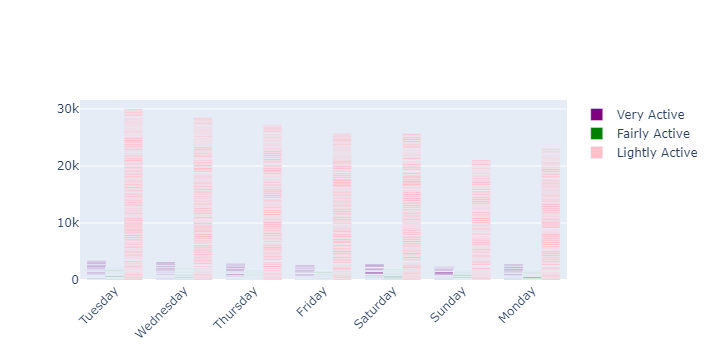

In [12]:
fig = go.Figure()
fig.add_trace(go.Bar(
    x=data['Day'],
    y=data['VeryActiveMinutes'],
    name='Very Active',
    marker_color='purple'
))
fig.add_trace(go.Bar(
    x=data['Day'],
    y=data['FairlyActiveMinutes'],
    name= 'Fairly Active',
    marker_color='green'
))
fig.add_trace(go.Bar(
    x=data['Day'],
    y=data['LightlyActiveMinutes'],
    name= 'Lightly Active',
    marker_color='pink'
))

fig.update_layout(barmode='group', xaxis_tickangle=-45)
fig.show()

Let's Examine the Number of Inactive Minutes for Each Day of the Week"

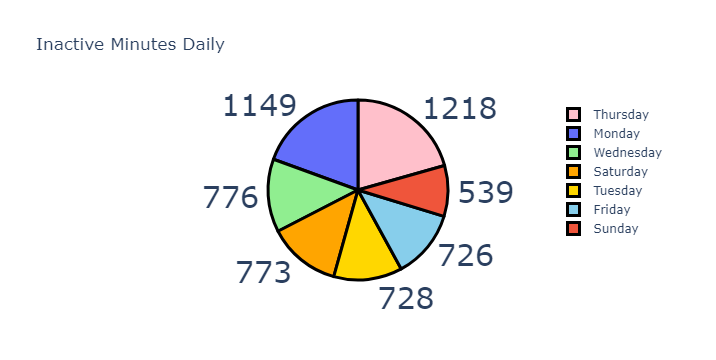

In [15]:
day = data['Day'].value_counts()
label = day.index
counts = data['SedentaryMinutes']
colors = ['gold','lightgreen','pink','skyblue','orange']

fig = go.Figure(data=[go.Pie(labels=label, values=counts)])
fig.update_layout(title_text='Inactive Minutes Daily')
fig.update_traces(hoverinfo='label+percent', textinfo='value', textfont_size=30,
                 marker=dict(colors=colors, line=dict(color='black', width=3)))

fig.show()

Based on the lifestyle of all individuals in the dataset, Thursday appears to be the least active day. Let's now investigate the number of calories burned on each day of the week.

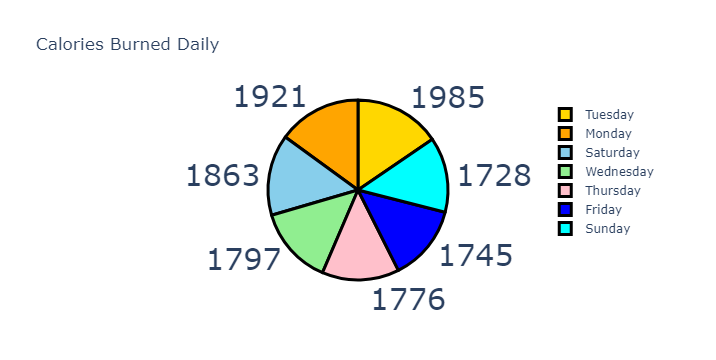

In [16]:
calories = data["Day"].value_counts()
label = calories.index
counts = data["Calories"]
colors = ['gold','lightgreen', "pink", "blue", "skyblue", "cyan", "orange"]

fig = go.Figure(data=[go.Pie(labels=label, values=counts)])
fig.update_layout(title_text='Calories Burned Daily')
fig.update_traces(hoverinfo='label+percent', textinfo='value', textfont_size=30,
                  marker=dict(colors=colors, line=dict(color='black', width=3)))
fig.show()

Tuesday emerges as one of the most active days among all individuals in the dataset, as it records the highest number of burned calories. With the Python programming language, this smartwatch data can be analyzed for various other purposes, such as predicting the daily calorie burn.